In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Generate 1 Sample

In [ ]:
#gaussian random x
import random as r
import math
def gaussian(max,len):
  mean = 2**(r.random() * math.log2(max) )
  std = r.random()*mean/2
  print(mean, std)
  x = [r.gauss(mean,std) for i in range(len)]
  return x

def uniform_int(min,max,len):
  return [r.randint(min,max) for i in range(len)]

list(range(1,31,1))

1.6341338071191054 0.44272294440486076


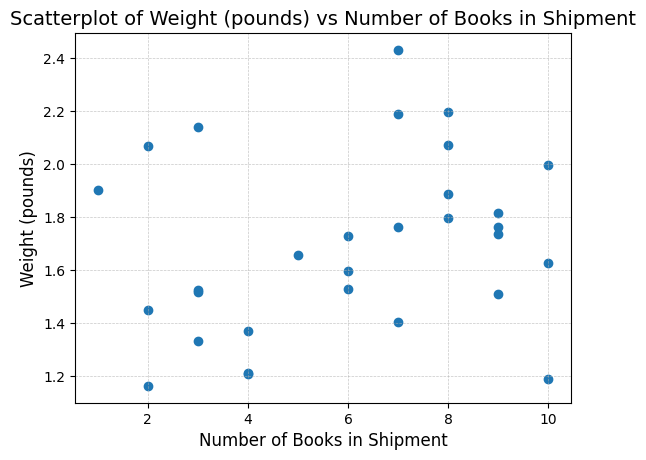

In [ ]:
def save_scatterplot(x, y, style, dpi, path, filename):
  plt.title('Scatterplot of Weight (pounds) vs Number of Books in Shipment', fontsize=14)
  plt.xlabel('Number of Books in Shipment', fontsize=12)
  plt.ylabel('Weight (pounds)', fontsize=12)

  plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
  plt.scatter(x,y)
  plt.savefig( path+filename, dpi=dpi)

path = "/content/drive/My Drive/Colab Notebooks/COSE474 Deep Learning HW/20242R0136COSE47402/Final Project"
filename = "scatterplot.png"
x=uniform_int(1,10,30)
y=gaussian(5,30)
save_scatterplot(x, y, 'stylle', 100, path+'/data/images/', filename)

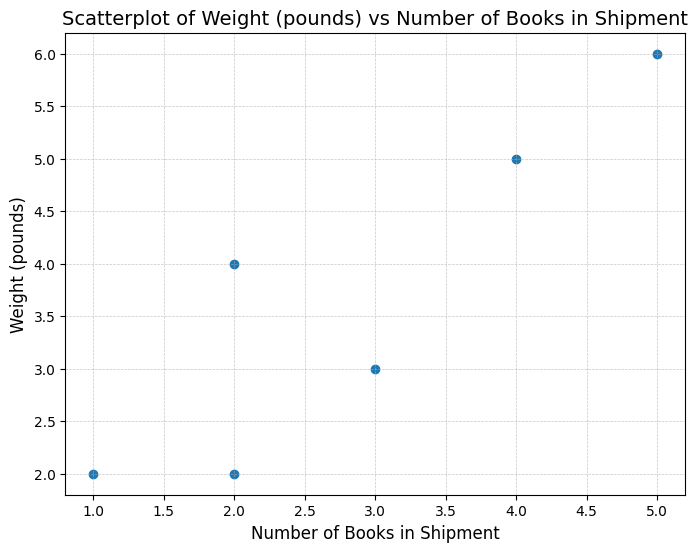

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.title('Scatterplot of Weight (pounds) vs Number of Books in Shipment', fontsize=14)
plt.xlabel('Number of Books in Shipment', fontsize=12)
plt.ylabel('Weight (pounds)', fontsize=12)

plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

x = [1,3,2,2,4,5]
y = [2,3,2,4,5,6]
plt.scatter(x,y)
plt.show()

In [ ]:
x
y=x

## Generate Scatterplot dataset

In [3]:
import matplotlib.pyplot as plt
import os
from PIL import Image

import random as r
import math
def gaussian(max,len):
  mean = 2**(r.random() * math.log2(max) )
  std = r.random()*mean/2
  #print(mean, std)
  x = [r.gauss(mean,std) for i in range(len)]
  return x

def uniform_int(min,max,len):
  return [r.randint(min,max) for i in range(len)]

def save_scatterplot(title, xlabel, ylabel, x, y, save_path):
  plt.figure()
  plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
  plt.scatter(x, y, c="blue", marker="o")
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid(True)
  plt.savefig(save_path, format="png")
  plt.close()  # 플롯을 닫아 메모리 절약
  return save_path

def create_text_data(title, xlabel, ylabel, x, y):
  text_data = "TITLE | "+ title + " <0x0A> " + xlabel + " | " + ylabel + " <0x0A> " + " <0x0A> ".join([f"{xi} | {yi}" for xi, yi in zip(x, y)])
  return text_data

def generate_dataset(title_list, xlabel_list, ylabel_list, x_list, y_list, image_dir, dataset_name="dataset"):
  """
    x와 y 데이터를 사용하여 이미지와 텍스트 데이터셋을 생성합니다.

    Args:
        x_list (list): x 좌표 데이터 리스트
        y_list (list): y 좌표 데이터 리스트
        image_dir (str): 산점도 이미지를 저장할 디렉토리
        dataset_name (str): 데이터셋 이름 (파일명 또는 출력 리스트 키)

    Returns:
        list: 이미지와 텍스트 쌍으로 구성된 데이터셋
  """
  os.makedirs(image_dir, exist_ok=True)  # 이미지 저장 디렉토리 생성
  dataset = []

  for i, (title, xlabel, ylabel, x, y) in enumerate(zip(title_list, xlabel_list, ylabel_list, x_list, y_list)):
    # 이미지 저장 경로
    image_path = os.path.join(image_dir, f"{dataset_name}_{i}.png")

    # 이미지 생성 및 저장
    save_scatterplot(title, xlabel, ylabel, x, y, image_path)

    # 텍스트 데이터 생성
    text = create_text_data(title, xlabel, ylabel, x, y)

    # 데이터셋 추가
    dataset.append({"image": image_path, "text": text})

  return dataset

def generate_titles(len):
  return [ "GDP growth rate vs CPI" for i in range(data_len) ]

def generate_xlabels(len):
  return [ "GDP growth rate" for i in range(data_len) ]

def generate_ylabels(len):
  return [ "CPI" for i in range(data_len) ]

# Example usage



In [4]:
if __name__ == "__main__":

  project_dir = "/content/drive/My Drive/Colab Notebooks/COSE474 Deep Learning HW/20242R0136COSE47402/Final Project"
  image_dir = project_dir + "/data/scatterplots"  # 이미지 저장 경로

  pkl_dir = project_dir + "/data/scatterplots"  # 텍스트 저장 경로

  # 예제 데이터
  data_len = 256 # plot 개수
  mean_points = 20 # plot당 평균 점 개수
  max_xy = 200 # 플롯 최댓값


  x_list = [[1, 2, 3], [4, 5, 6, 2], [7, 8, 9], gaussian(10,10)]  # x 데이터 (샘플당 3개 점)
  y_list = [[10, 11, 12], [13, 14, 15,10], [12, 17, 18], gaussian(10,10)]  # y 데이터 (샘플당 3개 점)
  title_list = ["GDP growth rate vs CPI","GDP growth rate vs log wage","GDP growth rate vs CPI","d"]
  xlabel_list = ["GDP growth rate", "GDP growth rate", "GDP growth rate","dd"]
  ylabel_list = ["CPI","log(wage)","CPI","ddd"]

  point_cnt = [ math.ceil(r.gauss(mean_points,4)) for i in range(data_len) ]
  x_list = [gaussian(r.randint(1,max_xy), point_cnt[i] )  for i in range(data_len) ]
  #[uniform_int(1,r.randint(2,max_xy), point_cnt[i] ) ) for i in range(data_len) ]
  y_list = [gaussian(r.randint(1,max_xy), point_cnt[i])  for i in range(data_len) ]
  title_list = generate_titles(data_len)
  xlabel_list = generate_xlabels(data_len)
  ylabel_list = generate_ylabels(data_len)

    # 데이터셋 생성
  dataset = generate_dataset(title_list, xlabel_list, ylabel_list,x_list, y_list, image_dir)

    # 생성된 데이터셋 확인
#  for data in dataset:
#    print(f"Image: {data['image']}, Text: {data['text']}")
print(dataset[0])

{'image': '/content/drive/My Drive/Colab Notebooks/COSE474 Deep Learning HW/20242R0136COSE47402/Final Project/data/scatterplots/dataset_0.png', 'text': 'TITLE | GDP growth rate vs CPI <0x0A> GDP growth rate | CPI <0x0A> 28.53213962782073 | 2.3297163481543497 <0x0A> 7.399459550098676 | 1.5171811695170245 <0x0A> 21.306661777900977 | 3.003650676275515 <0x0A> 28.510388461775136 | 2.480563635735452 <0x0A> 30.27481330550052 | 3.5711087747670653 <0x0A> 34.464624754386776 | 2.1923832220470905 <0x0A> 27.496970170286794 | 3.9831170956566186 <0x0A> 24.840440536221337 | 3.80176120872966 <0x0A> 19.598993963862267 | 2.957791467778977 <0x0A> 37.99504403963367 | 2.833574409635967 <0x0A> 40.291995040860584 | 2.2838077573947677 <0x0A> 24.788183956285987 | 2.6218512533254628 <0x0A> 8.393454062208018 | 2.2645945576547923 <0x0A> 24.632117784350164 | 3.8441553499539047 <0x0A> 38.98426524761273 | 2.5390034698301944 <0x0A> 35.965831670078245 | 3.7618153858413987 <0x0A> 27.153018680249982 | 3.2727502149961762 

In [11]:
# prompt: save dataset as file to use again

import pickle

# Save the dataset to a file
with open(pkl_dir+'/dataset.pkl', 'wb') as f:
    pickle.dump(dataset, f)

# Load the dataset from the file
with open(pkl_dir+'/dataset.pkl', 'rb') as f:
    loaded_dataset = pickle.load(f)

# Verify that the loaded dataset is the same as the original
print(loaded_dataset == dataset)

True


In [7]:
# prompt: open scatterplots/dataset_1.png file with PIL

from PIL import Image
import os

image_path = image_dir+"/dataset_1.png"

try:
    img = Image.open(image_path)
    print(f"Image '{image_path}' opened successfully.")
    # You can now perform operations on the image (e.g., display, resize, etc.)
except FileNotFoundError:
    print(f"Error: Image file not found at '{image_path}'")
except Exception as e:
    print(f"An error occurred: {e}")

Image '/content/drive/My Drive/Colab Notebooks/COSE474 Deep Learning HW/20242R0136COSE47402/Final Project/data/scatterplots/dataset_1.png' opened successfully.


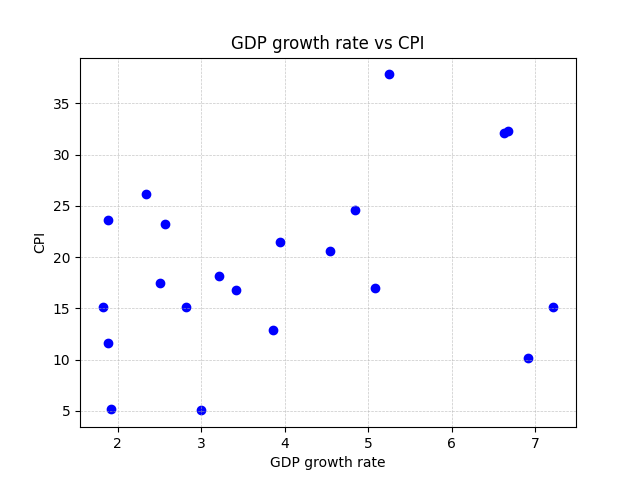

In [10]:
img

In [9]:
loaded_dataset[0]

{'image': 'scatterplots/dataset_0.png',
 'text': 'TITLE | GDP growth rate vs CPI <0x0A> GDP growth rate | CPI <0x0A> 70.95736948737573 | 4.394831433101062 <0x0A> 75.3310527411982 | 4.185180576960599 <0x0A> 82.4358507108679 | 5.4219294307551795 <0x0A> 73.34272638364816 | 4.552684515646172 <0x0A> 77.77823781502474 | 3.756089249934249 <0x0A> 73.64514927274139 | 3.865998629247014 <0x0A> 75.3502716887153 | 3.5540656386120437 <0x0A> 77.05169840018728 | 4.399027375964075 <0x0A> 74.76113899454721 | 4.370056426388234 <0x0A> 72.6947543942623 | 3.795894938579826 <0x0A> 70.86711492372345 | 3.680870847626002 <0x0A> 75.328621849635 | 5.026991716074215 <0x0A> 74.95400124732159 | 4.58095096053796 <0x0A> 80.58199810697651 | 3.5831934411240045 <0x0A> 84.22220074218887 | 5.370363303550874 <0x0A> 88.79866204966508 | 4.139372754005821 <0x0A> 66.59740915048795 | 3.6497764551322325'}